In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

image = io.imread("/home/hre070/MA/DJI_0095_CLIP.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
1644300


## LBP

In [4]:
#IMPORTS
import sys
sys.path.append("/home/hre070/MA/TextureSeg/")
from frequency import frequency_setup

sys.path.append("/home/hre070/MA/TextureSeg/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


### Furier setup

In [9]:
tex_info = frequency_setup(im_gray, 5, 70, 100, 1.0, 0.1)

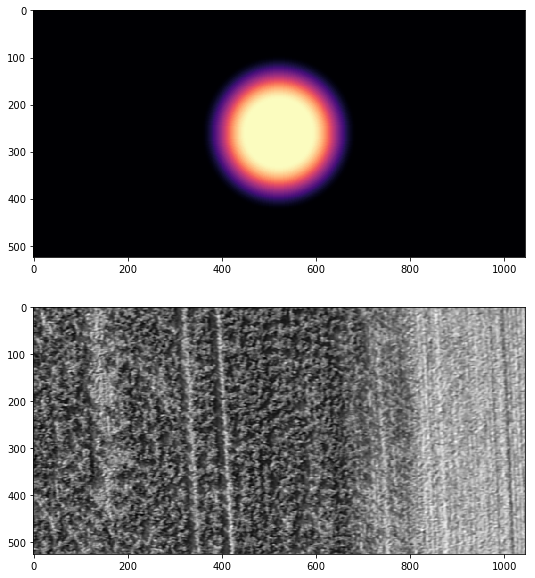

In [19]:
f, ax = plt.subplots(nrows=2, figsize=(10, 10))

#ax.imshow(image)
ax[0].imshow(tex_info.low_pass, cmap="magma", alpha=1 )
ax[1].imshow(tex_info.result(), cmap="gray", alpha=1 )

In [10]:
print(tex_info.lbp_radius)

8


In [30]:
# settings for LBP
METHOD = 'default'
radius = tex_info.lbp_radius
#radius = 1

n_points = 8 

lbp_img = lbp.local_binary_pattern(tex_info.result(), None, n_points, radius, METHOD)


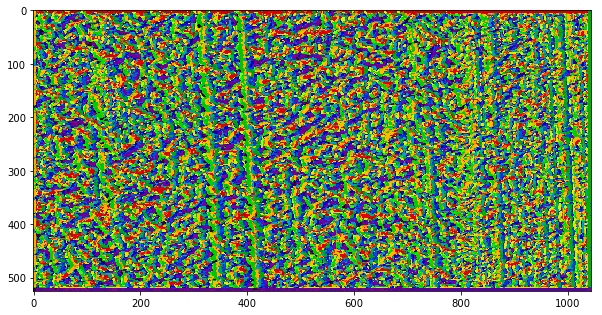

In [31]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_img, cmap=plt.cm.spectral, alpha=1 )

## Random LBP

In [6]:
import lbp_bins

In [7]:
BINS = lbp_bins.lbp_bins(n_points, METHOD)

lookup = dict(enumerate(BINS))

#print(lookup)
print("="*50)
print(len(np.unique(lbp_img)), len(BINS))

1016 1024


In [8]:
lbp_random = np.vectorize(lookup.__getitem__)(np.random.randint(len(BINS), size=lbp_img.shape))

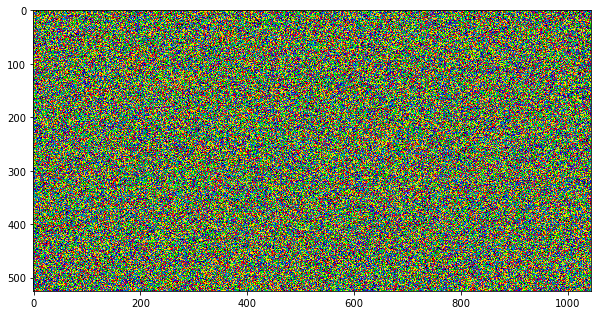

In [9]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_random, cmap=plt.cm.spectral, alpha=1 )

## Correlation

In [10]:
print(np.corrcoef(lbp_img.flat, lbp_random.flat)[0][1])

-0.00245242535476


In [11]:
bool_array = lbp_img == lbp

In [12]:
type(bool_array)

bool_array[2, 1]

False

## Furier Transform

In [13]:
from numpy.fft import *

In [33]:
start = 100
width = 300


end  = start+width

clip = im_gray[start:end, start:end]

In [15]:
clip[150: , :] -= 0.5 

In [16]:
clip = im_gray

In [17]:
from skimage.filters import gaussian

clip = gaussian(clip, sigma=1)


In [18]:


clip += np.random.randint(100, size=clip.shape)/300


In [19]:
import skimage.data as data

In [20]:
clip = data.coins()

In [21]:
clip = np.random.randint(256, size=(200, 200))

In [22]:
clip = np.zeros((200,200), dtype=np.float64)
clip += 0.05
clip[100: , :] += 0.5 
clip[: , ::20] += 0.5 
clip[: , ::21] += 0.5
clip[::10 , ::] += 0.5 


In [23]:
print(clip.max(), clip.min())

2.05 0.05


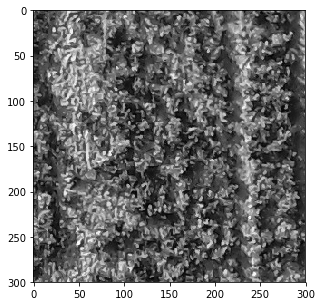

In [34]:
f, ax = plt.subplots(figsize=(5, 5))

#ax.imshow(image)
ax.imshow(clip)

In [35]:
#Apply shifted furier transform
dft = fftshift(fft2(clip))

dft_plot = np.abs(np.log(dft))

In [26]:
#Generate random noise within brightness spectrum of the image

factor = 10000
lower = clip.min()*factor
upper = clip.max()*factor

noise = np.random.randint(lower, upper, size=clip.shape)/factor

In [27]:
#Apply filter to dft


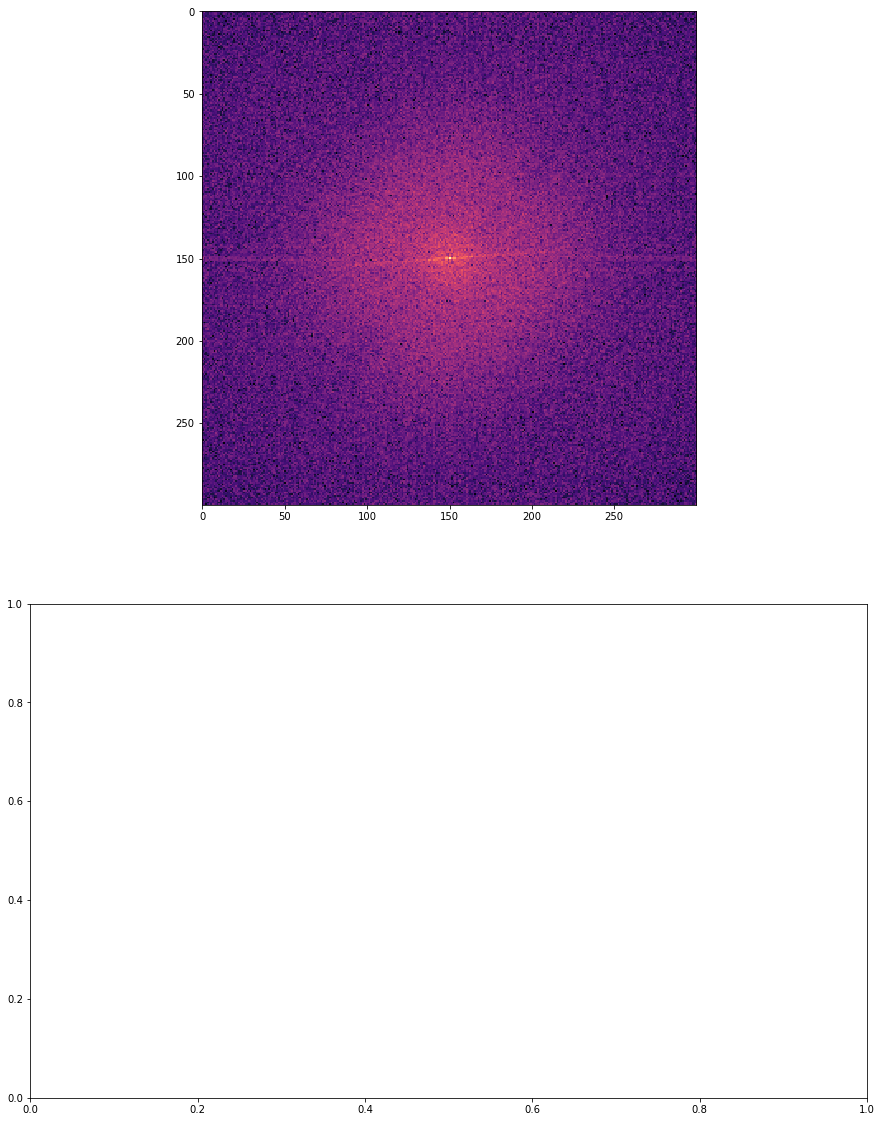

In [36]:
f, ax = plt.subplots(nrows=2, figsize=(15, 20))

#ax.imshow(image)
ax[0].imshow(dft_plot, cmap="magma")
#ax[1].imshow(np.abs(np.log(filtered_dft)), cmap="magma")

In [ ]:
reverse = ifft2(ifftshift(filtered_dft))

In [ ]:
f, ax = plt.subplots(ncols=2, figsize=(5, 5))

#ax.imshow(image)
ax[0].imshow(clip)
ax[0].set_title("Original")
ax[1].imshow(reverse)

In [ ]:
np.fft.

## Furier summary

In [37]:
from frequency import dft_summary

In [38]:
dft.shape

(300, 300)

In [60]:
test = dft_summary(dft_plot, width=2)

In [56]:
test_values = list(test.values())

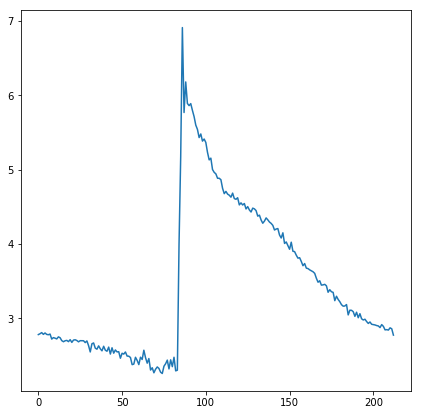

In [57]:
f, ax = plt.subplots(figsize=(7,7))

ax.plot(test_values)

In [61]:
test


{0: 6.7181724696603267,
 1: 5.9965918649337766,
 2: 5.8718192754081944,
 3: 5.8356895044242423,
 4: 5.6557919953774833,
 5: 5.4875647729188399,
 6: 5.4281872616742826,
 7: 5.3872270926637871,
 8: 5.1763574781795185,
 9: 5.0773328056183118,
 10: 4.9518630458840835,
 11: 4.8833573767140273,
 12: 4.8029023314350514,
 13: 4.6909537601026106,
 14: 4.66237141136794,
 15: 4.6575363237903069,
 16: 4.605393065576072,
 17: 4.5754951476181498,
 18: 4.5379442359979851,
 19: 4.5077009405434962,
 20: 4.4778881240983397,
 21: 4.4563102659824096,
 22: 4.4599268142769173,
 23: 4.3803446974945537,
 24: 4.3005520145010312,
 25: 4.3278627684184823,
 26: 4.3085612225457659,
 27: 4.2618163782528358,
 28: 4.1938017709874167,
 29: 4.1628889309588244,
 30: 4.114252745239412,
 31: 4.0162307005496123,
 32: 3.9506290538372126,
 33: 3.9602674441327252,
 34: 3.8732310163933836,
 35: 3.811243396893,
 36: 3.7357034466218364,
 37: 3.7045084412732758,
 38: 3.6593026089982406,
 39: 3.6319378786409424,
 40: 3.57128836527

## Cross Tabulation